# Exercice 1: feature importance (result interpretation)

In [23]:
#(a) Load the ’Boston’ dataset
import pandas as pd

df = pd.read_csv("./boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
#b) Validate the predictive power of a random forest and a xgb regressor both with 500 trees on the Boston dataset.

#divide the dataset into a training dataset and a test dataset
X_train = df[:400]
X_test = df[400:]
Y_train = X_train['0']
Y_test = X_test['0']
X_train.drop(['0'], axis=1, inplace=True)
X_test.drop(['0'], axis=1, inplace=True)

C:\Users\33695\AppData\Local\Temp\ipykernel_16716\1411317173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['0'], axis=1, inplace=True)
C:\Users\33695\AppData\Local\Temp\ipykernel_16716\1411317173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['0'], axis=1, inplace=True)


In [25]:
#STEP 1 : xgboost 

import xgboost as xgb 

#create and fit the model with 500 trees
model = xgb.XGBRegressor(n_estimators=500)
model.fit(X_train, Y_train)

xgb_predictions = model.predict(X_test)

In [26]:
#STEP 2 : RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)

randomforest_predictions = model.predict(X_test)

In [27]:
#using mse to compare results

from sklearn.metrics import mean_squared_error

xgb_mse = mean_squared_error(Y_test, xgb_predictions)
randomforest_mse = mean_squared_error(Y_test, randomforest_predictions)

print('xgb mse :',  xgb_mse)
print('random forest mse :',  randomforest_mse)

xgb mse : 18.700565177103723
random forest mse : 17.514328841509478


 * Both models have a predictive power

In [28]:
#(c) Train the previous models on the whole dataset and evaluate them on the same data.

X_whole = df.drop(['0'], axis=1)
Y_whole = df['0']

In [29]:
#random forest
model_rf = RandomForestRegressor(n_estimators=500)
model_rf.fit(X_whole, Y_whole)
whole_rf_predictions=model_rf.predict(X_whole)
whole_randomforest_mse = mean_squared_error(Y_whole, whole_rf_predictions)

#xgboost
model_xgb = xgb.XGBRegressor(n_estimators=500)
model_xgb.fit(X_whole, Y_whole)
whole_xgb_predictions=model_xgb.predict(X_whole)
whole_xgb_mse = mean_squared_error(Y_whole, whole_xgb_predictions)

print('xgb mse on whole data :',  whole_xgb_mse)
print('random forest mse on whole data :',  whole_randomforest_mse)

xgb mse on whole data : 1.9282491175256866e-06
random forest mse on whole data : 1.383787880553356


* xgboost is the model that best predicts training values

In [30]:
#(d) Compute 2 types of feature importance according to the 2 regressors, plot them and conclude

features_rf = model_rf.feature_importances_
features_xgb = model_xgb.feature_importances_

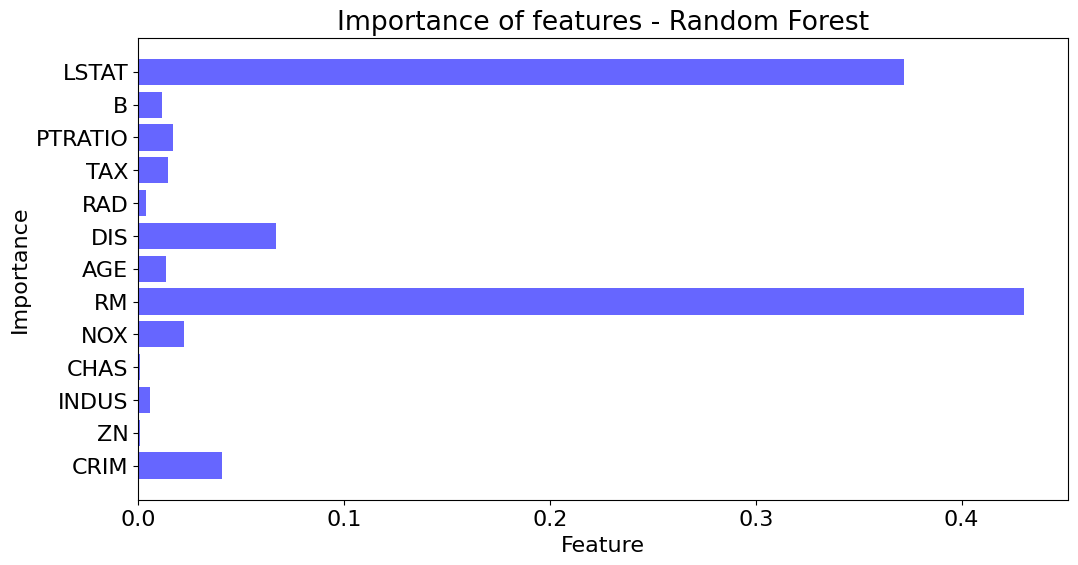

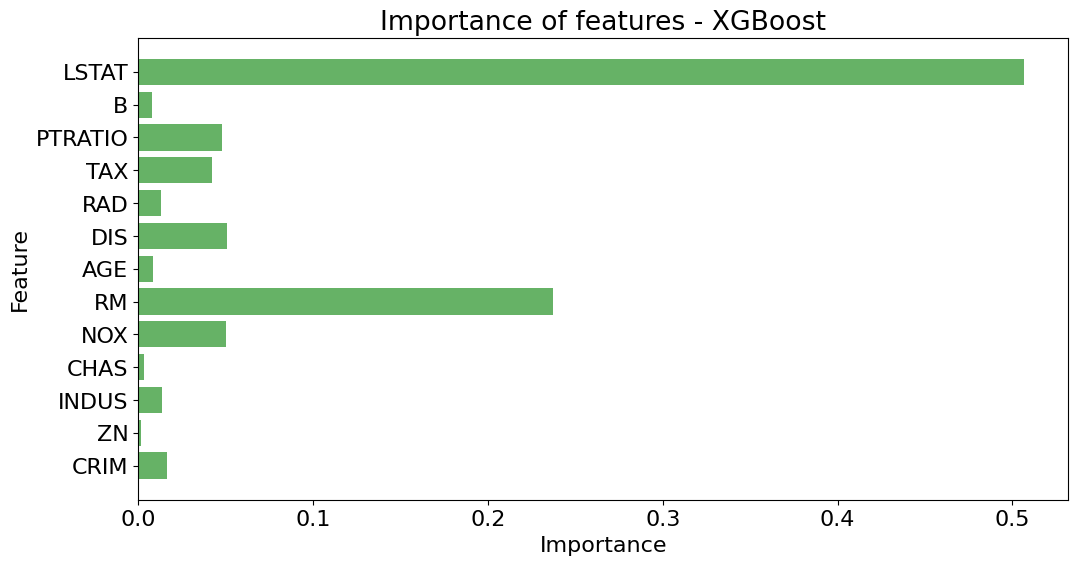

In [31]:
import matplotlib.pyplot as plt

feature_names = X_whole.columns

# Random Forest plotting
plt.figure(figsize=(12, 6))
plt.title('Importance of features - Random Forest')
plt.barh(feature_names, features_rf, color='blue', alpha=0.6)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# XGBoost plotting
plt.figure(figsize=(12, 6))
plt.title('Importance of features - XGBoost')
plt.barh(feature_names, features_xgb, color='green', alpha=0.6)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

* In the two models, the features RM and LSTAT are the most important features.

# Exercice 2: models comparison

In [34]:
# (a) Import the wine dataset from this link 1 and plot the corresponding correlation matrix
# with a clear and readable heatmap that respect the following constraints:
# - the legend should include extreme correlations values (i.e. -1 and +1)
# - negative/positive correlations should be represented respectively by cold/warm colours
# - x-labels have to be rotated of 45◦
# - all variable names have to be clearly readable

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./wine.csv", sep = ";")
df.head()

,Alcohol,MalicAcid,Ash,AlcalinityOAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,colorIntensity,Hue,OD280.OD315.ofDilutedWines,Proline,class
0,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,class2
1,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,class2
2,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,class1
3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,class3
4,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,class3


In [36]:
plt.figure(figsize=(20, 5))
plt.rcParams['font.size'] = '16'
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

ValueError: could not convert string to float: 'class2'

<Figure size 2000x500 with 0 Axes>